In [5]:
import sys
sys.path.append('..')

import h5py
import numpy as np
import processing as pr

In [6]:
proposal = 2530
run = 50
module_number = 0
pattern = ['image', 'dark'] * 99 + ['end_image']

module = pr.Module(proposal=proposal, run=run, module=module_number, pattern=pattern)

In [9]:
module.xgm.data.shape

(597762,)

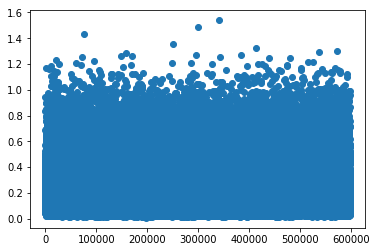

In [11]:
import matplotlib.pyplot as plt

plt.plot(module.xgm.data, 'o')

In [23]:
a = module.process_frames(frame_type='dark', train_indices=range(10))
a.shape

(99, 128, 512)

In [4]:
b = module.process_frames(frame_type='image', train_indices=range(10))
b.shape

In [6]:
module.process_std(train_indices=range(10), dirname='processed_runs_xgm')

In [7]:
module.process_normalised(dark_run=49, train_indices=range(10), dirname='processed_runs_xgm')

In [20]:
filename = f'processed_runs_xgm/run_{run}/module_{module_number}_std.h5'
with h5py.File(filename, 'r') as f:
    data1 = f['dark_average'][:]
    data2 = f['image_average'][:] 
np.mean(data2 - data1, axis=0).min()

-3.915151515151516

In [ ]:
data.max()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data.squeeze())